In [1]:
# Adapted from: https://github.com/Shubha23/Fake-News-Detection-Text-Preprocessing-and-Classification/blob/master/fake-news-detection-text-pre-processing-using-nltk.ipynb
# and: https://github.com/manthan89-py/Fake_News_detection/blob/master/Fake%20News.ipynb

# Original data can be found here: https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php

# Import necessary Python libraries, modules, etc.
import time # for generating timestamps 
import re # for regular expressions
import string as st # for removing punctuation
import numpy as np # for linear algebra
import pandas as pd # for frame processing
import matplotlib.pyplot as plt # for data visualization
import nltk # for natural language processing
from nltk.corpus import stopwords # for removing english stopwords
from nltk.stem import WordNetLemmatizer # for term stemming
import sklearn # for predictive data analysis
from sklearn import preprocessing # for data preprocessing
from sklearn.model_selection import train_test_split # for splitting data into test/train sets
from sklearn.feature_extraction.text import TfidfVectorizer # for text vectorization
from wordcloud import WordCloud, ImageColorGenerator
from IPython.core.interactiveshell import InteractiveShell # to modify Jupyter notebook configuration
InteractiveShell.ast_node_interactivity = "all" # so that all outputs in a cell are returned (instead of last instance)

In [2]:
# Load the fake and true news CSVs into Pandas dataframes
true_news = pd.read_csv('True.csv') 
fake_news = pd.read_csv('Fake.csv')

# Add column for fake/true label
true_news['label'] = 'true'
fake_news['label'] = 'fake'

# True and Fake news value counts - are they balanced?
print("Compare number of observations in true news and fake news data frames")
true_news['label'].value_counts()
print()
fake_news['label'].value_counts()
print()

# Remove random rows from fake_news (n = 2064) data frame so it has same number of rows as true_news
np.random.seed(5)

remove_n = 2064
drop_indices = np.random.choice(fake_news.index, remove_n, replace = False)
fake_news = fake_news.drop(drop_indices)

# Check that have same number of observations now
print("True and fake datasets should have same number of samples now...")
true_news['label'].value_counts()
print()
fake_news['label'].value_counts()
print()

# Preview first 5 rows in datasets to ensure they imported properly
print("Preview of the raw datasets to ensure they imported properly:")
true_news.head()
print()
fake_news.head()
print()

Compare number of observations in true news and fake news data frames


true    21417
Name: label, dtype: int64

fake    23481
Name: label, dtype: int64


True and fake datasets should have same number of samples now...


true    21417
Name: label, dtype: int64

fake    21417
Name: label, dtype: int64


Preview of the raw datasets to ensure they imported properly:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [3]:
# Combine true_news and fake_news data frames into one
dfs = [true_news, fake_news]
news_data = pd.concat(dfs)

# Instantiate instance of LabelEncoder
le = preprocessing.LabelEncoder()

# Assign numerical values to column of target values (true = 1, fake = 0)
news_data['target'] = le.fit_transform(news_data['label'])

# Concatenate text columns and isolate only relevant columns for analysis (i.e., text and target)
news_data['text'] = news_data['title'] + ' ' + news_data['text']
news_data = news_data[['text', 'target']]

# Check that binary values were assigned correctly
print("Dimensions of data frame that will be cleaned:")
news_data.shape # data frame dimensions
print()

print("First and last five rows of pre-cleaned concatenated dataset:")
news_data.head(-5) # first 5 and last 5 rows
print()

print("Null values by column:")
news_data.isnull().sum() # check for null values
print()

Dimensions of data frame that will be cleaned:


(42834, 2)


First and last five rows of pre-cleaned concatenated dataset:


,text,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23471,Seven Iranians freed in the prisoner swap have...,0
23472,#Hashtag Hell & The Fake Left By Dady Chery a...,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,0
23474,The New American Century: An Era of Fraud Paul...,0



Null values by column:


text      0
target    0
dtype: int64

In [4]:
# Instantiate WordNetLemmatizer() -- reduce words to their roots
wnl = WordNetLemmatizer()

# Download multilingual Wordnet data from OMW
nltk.download('omw-1.4')

# List of english stopwords
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

# Download english dictionary ('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zloken\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zloken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zloken\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Define function for cleaning data
def data_cleaning(row):
    row = row.lower() # convert text into lowercase
    row = re.sub('[^a-zA-Z]', ' ', row) # remove number and special characters using regex (keep words only)
    token = row.split() # split the data and tokenize it
    news = [wnl.lemmatize(word) for word in token if not word in stop_words] # lemmatize the words and remove any stopwords (e.g., a, an, the, etc.)
    row_clean = [word for word in news if len(word) >= 3] # only keep words greater than or equal to length of 3
    cleaned_news = ' '.join(row_clean) # join all tokenized words with space in between 
    
    return cleaned_news

# Clean the data - might take a couple minutes to run.
news_data['text'] = news_data['text'].apply(lambda x : data_cleaning(x)) # 'text' column
print("First and last five rows after cleaning the data:")
news_data.head(-5) # check that cleaning went as planned
print()

# Check for null values
print("Null values by column:")
news_data.isnull().sum() # want zero null values
print()

# Check number unique values in each column
print("Unique values by column:")
news_data.nunique() # number unique values in each column
print()

First and last five rows after cleaning the data:


,text,target
0,budget fight loom republican flip fiscal scrip...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator let mueller job wash...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump want postal service charge much amazon s...,1
...,...,...
23471,seven iranian freed prisoner swap returned ira...,0
23472,hashtag hell fake left dady chery gilbert merc...,0
23473,astroturfing journalist reveals brainwashing t...,0
23474,new american century era fraud paul craig robe...,0



Null values by column:


text      0
target    0
dtype: int64


Unique values by column:


text      37681
target        2
dtype: int64

In [6]:
# Separate news_data into predictor and response variables
X = news_data.iloc[:, 0] # features used to predict if news is fake or true
y = news_data.iloc[:, 1] # what we're trying to predict: (whether is fake(0) or true(1))

# Split the data into training and test subsets
train_data, test_data, train_target, test_target = train_test_split(X, y, random_state = 5, train_size = 0.80)

# View first 5 rows to ensure data split worked correctly
print("The first and last five rows of training_data are:")
train_data.head(-5)
print()

print("The first and last five rows of testing_data are:")
test_data.head(-5)
print()

print("The first and last five rows of training_target are:")
train_target.head(-5)
print()

# Double check data partitioning after split - are they balanced?
print("Data partitioning of true and fake values in the training data:")
train_target.value_counts() # balanced partition of train data
print()

print("Data partitioning of true and fake values in the testing data:")
test_target.value_counts() # balanced partition of test data
print()

The first and last five rows of training_data are:


15773    breaking baltimore riot video report black gue...
17245    afghan school closing due violence undermining...
2139     house intelligence committee trump lied obama ...
14147    coincidence extradites romanian hacker clinton...
10862    priceless home depot founder zing liberal pres...
                               ...                        
15139    rand paul pick fight wrong senator say cruz pr...
14627    holy betrayal america national security new ev...
16103    france keen avoid student anger plan billion e...
13272    nfl denies dallas cowboy request honor slain p...
13602    funny moron crooked hillary frighten every ame...
Name: text, Length: 34262, dtype: object


The first and last five rows of testing_data are:


16911    baghdad must show restraint respect kurdish ri...
20004    flame raced along train west london station ey...
12384    breaking trump reportedly considering ted cruz...
8299     revealed one hillary clinton goldman sachs spe...
6463     hillary clinton nyc mayor probably rumor persi...
                               ...                        
4277     melania quite possibly tried troll press style...
13976    hysterical guy spent majority term golf course...
3101     sean hannity stupid know retweeted anti trump ...
14586    trump make big announcement fox news say keep ...
867      house committee want document former trump aid...
Name: text, Length: 8562, dtype: object


The first and last five rows of training_target are:


15773    0
17245    1
2139     0
14147    0
10862    0
        ..
15139    0
14627    0
16103    1
13272    0
13602    0
Name: target, Length: 34262, dtype: int32


Data partitioning of true and fake values in the training data:


0    17193
1    17074
Name: target, dtype: int64


Data partitioning of true and fake values in the testing data:


1    4343
0    4224
Name: target, dtype: int64

In [7]:
# List of different values to try for TfidVectorizer max_features (i.e., top key words)
key_words = [100, 500, 1000, 5000] # How many of the top key words to keep - iterate over list
n_grams = [(1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3)] # ngram_range dictates if we keep 1 word (1, 1), 1 or 2 words (1, 2) etc. 

# Max features parameter chooses the top n words (iterate over key_words list)
for ng in n_grams:

    # ngram_range parameter defines phrase length.
    # (1, 1) keeps single words only, (3,3) keeps three word phrases,
    # (1, 3) keeps one, two, or three word phrases in top n words and so on. 
    for kw in key_words:

        # Create variable for storing start time
        start_time = time.time()

        # Instantiate vectorizer
        vectorizer = TfidfVectorizer(max_features = kw, lowercase = False, ngram_range = ng)

        # Vectorize training data
        vec_train_data = vectorizer.fit_transform(train_data)
        vec_train_data = vec_train_data.toarray()

        # Vectorize test data
        vec_test_data = vectorizer.transform(test_data).toarray()

        # Double check dimensions
        print(f"The pre-vectorization training data shape using top {kw} words and an n-gram range of {ng} is: {train_data.shape}")
        print()
        print(f"The pre-vectorization testing data shape using top {kw} words and an n-gram range of {ng} is: {test_data.shape}")
        print()
        print(f"The post-vectorization training data shape using top {kw} words and an n-gram range of {ng} is: {vec_train_data.shape}")
        print()
        print(f"The post-vectorization testing data shape using top {kw} words and an n-gram range of {ng} is: {vec_test_data.shape}")
        print()
        
        # Store vectorized training and test data into respective dfs - this is the final data to use in training/evaluation
        training_data = pd.DataFrame(vec_train_data , columns = vectorizer.get_feature_names_out())
        print(f"The first and last five rows of final training data using top {kw} words and an n-gram range of {ng} are:") 
        training_data.head(-5)
        print()

        testing_data = pd.DataFrame(vec_test_data , columns = vectorizer.get_feature_names_out())
        print(f"The first and last five rows of final testing data using top {kw} words and an n-gram range of {ng} are:") 
        testing_data.head(-5)
        print()

        # Print time stamp for each iteration in nested loop - can be modified to calculate runtime for each classifier
        current_time = time.time() # current time in executed code
        elapsed_time = current_time - start_time # elapsed time (i.e., how long it took to run iteration)
        print(f"The time to vectorize the data using top {kw} words and an n-gram range of {ng} is: {elapsed_time:.2f} seconds")
        print()

        # # Write final vectorized training and testing data to CSV - if you want them saved.
        # # Took me about 45 minutes to run when saving individually as CSVs. 
        # training_data.to_csv(f'training_data_{kw}words_{ng}range.csv')
        # testing_data.to_csv(f'testing_data_{kw}words_{ng}range.csv')

        # Continue here with your evaluation of traditional classification model inside the for loop...

        

The pre-vectorization training data shape using top 100 words and an n-gram range of (1, 1) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (1, 1) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (1, 1) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (1, 1) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (1, 1) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,want,washington,way,week,well,white,woman,world,would,year
0,0.000000,0.0,0.086665,0.062495,0.000000,0.134295,0.113943,0.000000,0.058061,0.000000,...,0.170714,0.000000,0.056876,0.053634,0.0,0.000000,0.000000,0.0,0.038608,0.000000
1,0.000000,0.0,0.080085,0.000000,0.000000,0.000000,0.000000,0.000000,0.107305,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.049336,0.0,0.036335,0.000000,0.087835,0.000000,0.000000,0.000000,0.000000,0.095295,...,0.000000,0.000000,0.095383,0.044973,0.0,0.093655,0.000000,0.0,0.194241,0.000000
3,0.202445,0.0,0.000000,0.000000,0.000000,0.000000,0.065342,0.000000,0.000000,0.000000,...,0.000000,0.060688,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.096554
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.147573,0.000000,0.0,0.144900,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.043900,0.000000,0.000000,0.000000,0.000000,0.142615,0.000000,0.057568,...,0.057650,0.214427,0.057621,0.054336,0.0,0.000000,0.000000,0.0,0.195567,0.042644
34258,0.229835,0.0,0.000000,0.162749,0.000000,0.000000,0.000000,0.000000,0.075600,0.073990,...,0.000000,0.000000,0.074058,0.000000,0.0,0.000000,0.090427,0.0,0.050271,0.000000
34259,0.000000,0.0,0.199192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.261582,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.088737,0.290239
34260,0.000000,0.0,0.000000,0.000000,0.052887,0.000000,0.172586,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.162475,0.0,0.000000,0.000000,0.0,0.038985,0.000000



The first and last five rows of final testing data using top 100 words and an n-gram range of (1, 1) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,want,washington,way,week,well,white,woman,world,would,year
0,0.196176,0.0,0.144479,0.000000,0.000000,0.000000,0.0,0.000000,0.193586,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.271219,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.118091,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.114154,0.000000,0.000000,0.000000,0.000000,0.0,0.309955,0.000000
3,0.000000,0.0,0.117053,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072441,0.241396,0.000000,0.562793,0.0,0.000000,0.000000
4,0.048537,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.116129,0.000000,0.140629,...,0.000000,0.000000,0.000000,0.088490,0.000000,0.046069,0.000000,0.0,0.031849,0.069448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.110430,0.0,0.000000,0.117295,0.000000,0.000000,0.0,0.132105,0.108972,0.106650,...,0.213606,0.000000,0.213497,0.000000,0.000000,0.000000,0.651720,0.0,0.144924,0.000000
8558,0.000000,0.0,0.059325,0.000000,0.000000,0.091929,0.0,0.385451,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.073429,0.000000,0.000000,0.000000,0.0,0.105713,0.000000
8559,0.000000,0.0,0.000000,0.181264,0.075955,0.000000,0.0,0.000000,0.000000,0.000000,...,0.247575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8560,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.156686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000



The time to vectorize the data using top 100 words and an n-gram range of (1, 1) is: 9.94 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (1, 1) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (1, 1) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (1, 1) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (1, 1) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (1, 1) are:


,able,according,account,accused,across,act,action,actually,added,administration,...,word,work,worker,working,world,would,wrote,year,yet,york
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.045696,0.000000,0.0,0.0,0.027869,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053283,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.059579,0.000000,0.053723,0.0
2,0.000000,0.039323,0.000000,0.054937,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.154816,0.000000,0.000000,0.000000,0.0
3,0.000000,0.126457,0.440400,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.056478,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.060312,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.117604,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.000000,0.000000,0.051521,0.0,0.000000,0.000000,0.097328,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.120991,0.000000,0.026382,0.000000,0.0
34258,0.000000,0.092813,0.000000,0.000000,0.0,0.039081,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.020301,0.000000,0.000000,0.000000,0.0
34259,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.041108,0.000000,0.000000,0.0,...,0.000000,0.000000,0.052691,0.0,0.0,0.022342,0.000000,0.073077,0.000000,0.0
34260,0.109491,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.026072,0.000000,0.000000,0.049981,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (1, 1) are:


,able,according,account,accused,across,act,action,actually,added,administration,...,word,work,worker,working,world,would,wrote,year,yet,york
0,0.0,0.107254,0.160081,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.043667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.114615,0.0,0.000000,0.000000,0.105856
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.113427,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.037912,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.024877,0.0,0.054246,0.047691,0.367621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.067150,0.000000,0.0,0.089371,0.000000,0.0,0.088612,0.0,0.0,...,0.359885,0.000000,0.0,0.000000,0.0,0.088125,0.0,0.000000,0.000000,0.000000
8558,0.0,0.000000,0.000000,0.0,0.000000,0.072665,0.0,0.000000,0.0,0.0,...,0.000000,0.061891,0.0,0.000000,0.0,0.075492,0.0,0.000000,0.000000,0.000000
8559,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8560,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000



The time to vectorize the data using top 500 words and an n-gram range of (1, 1) is: 9.49 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (1, 1) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (1, 1) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (1, 1) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (1, 1) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (1, 1) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,working,world,would,wrong,wrote,year,yes,yet,york,young
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.023662,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.054688
1,0.000000,0.0,0.000000,0.143227,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043117,0.000000,0.0,0.038879,0.0,0.046873
2,0.000000,0.0,0.115957,0.000000,0.035636,0.000000,0.049787,0.0,0.000000,0.000000,...,0.0,0.0,0.140302,0.054850,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.059734,0.116011,0.404020,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.055330,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.037993,0.0,0.000000,0.000000,...,0.0,0.0,0.089222,0.083713,0.000000,0.019455,0.0,0.000000,0.0,0.000000
34258,0.000000,0.0,0.045191,0.257434,0.083328,0.000000,0.000000,0.0,0.035087,0.000000,...,0.0,0.0,0.018226,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
34259,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.037429,...,0.0,0.0,0.020343,0.000000,0.000000,0.066538,0.0,0.000000,0.0,0.000000
34260,0.094866,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.022590,0.105974,0.000000,0.000000,0.0,0.043305,0.0,0.000000



The first and last five rows of final testing data using top 1000 words and an n-gram range of (1, 1) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,working,world,would,wrong,wrote,year,yes,yet,york,young
0,0.0,0.0,0.000000,0.0,0.062393,0.093123,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.040313,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.105809,0.0,0.0,0.000000,0.000000,0.000000,0.097723,0.0
3,0.0,0.0,0.076668,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.033898,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.022243,0.0,0.0,0.048501,0.000000,0.042641,0.328692,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.000000,0.0,0.058125,0.000000,0.0,0.077359,0.000000,0.0,...,0.000000,0.0,0.076281,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8558,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.066962,0.0,...,0.000000,0.0,0.069566,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8559,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.072057,0.000000,0.000000,0.0
8560,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (1, 1) is: 10.74 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (1, 1) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (1, 1) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (1, 1) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (1, 1) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (1, 1) are:


,abadi,abandon,abandoned,abbas,abc,abdullah,abe,abedin,ability,able,...,youtu,youtube,ypg,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.097433,0.0,0.0,0.0,0.000000,0.0,0.0,0.039235,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.143769,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058256,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (1, 1) are:


,abadi,abandon,abandoned,abbas,abc,abdullah,abe,abedin,ability,able,...,youtu,youtube,ypg,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.063055,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.058211,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (1, 1) is: 10.16 seconds

The pre-vectorization training data shape using top 100 words and an n-gram range of (1, 2) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (1, 2) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (1, 2) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (1, 2) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (1, 2) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,white house,woman,world,would,year
0,0.000000,0.0,0.086842,0.062623,0.000000,0.134569,0.114176,0.000000,0.058179,0.000000,...,0.000000,0.056992,0.053744,0.0,0.000000,0.000000,0.000000,0.0,0.038687,0.000000
1,0.000000,0.0,0.080085,0.000000,0.000000,0.000000,0.000000,0.000000,0.107305,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.049235,0.0,0.036261,0.000000,0.087655,0.000000,0.000000,0.000000,0.000000,0.095101,...,0.000000,0.095188,0.044881,0.0,0.093464,0.052262,0.000000,0.0,0.193844,0.000000
3,0.203602,0.0,0.000000,0.000000,0.000000,0.000000,0.065715,0.000000,0.000000,0.000000,...,0.061035,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.097105
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.144760,0.000000,0.0,0.142138,0.158959,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.043900,0.000000,0.000000,0.000000,0.000000,0.142615,0.000000,0.057568,...,0.214427,0.057621,0.054336,0.0,0.000000,0.000000,0.000000,0.0,0.195567,0.042644
34258,0.233826,0.0,0.000000,0.165575,0.000000,0.000000,0.000000,0.000000,0.076913,0.075274,...,0.000000,0.075343,0.000000,0.0,0.000000,0.000000,0.091997,0.0,0.051144,0.000000
34259,0.000000,0.0,0.199192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.088737,0.290239
34260,0.000000,0.0,0.000000,0.000000,0.053099,0.000000,0.173278,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.163127,0.0,0.000000,0.000000,0.000000,0.0,0.039142,0.000000



The first and last five rows of final testing data using top 100 words and an n-gram range of (1, 2) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,white house,woman,world,would,year
0,0.196176,0.0,0.144479,0.000000,0.000000,0.00000,0.0,0.000000,0.193586,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.271219,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.116297,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.112420,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.305247,0.000000
3,0.000000,0.0,0.118685,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073450,0.244761,0.000000,0.000000,0.570639,0.0,0.000000,0.000000
4,0.048509,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.116060,0.000000,0.140545,...,0.000000,0.000000,0.088438,0.000000,0.046042,0.051491,0.000000,0.0,0.031830,0.069407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.110056,0.0,0.000000,0.116898,0.000000,0.00000,0.0,0.131658,0.108604,0.106290,...,0.000000,0.212775,0.000000,0.000000,0.000000,0.000000,0.649517,0.0,0.144434,0.000000
8558,0.000000,0.0,0.059764,0.000000,0.000000,0.09261,0.0,0.388307,0.000000,0.000000,...,0.000000,0.000000,0.073973,0.000000,0.000000,0.000000,0.000000,0.0,0.106496,0.000000
8559,0.000000,0.0,0.000000,0.181264,0.075955,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8560,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.155377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000



The time to vectorize the data using top 100 words and an n-gram range of (1, 2) is: 39.81 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (1, 2) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (1, 2) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (1, 2) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (1, 2) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (1, 2) are:


,able,according,accused,across,act,action,actually,added,administration,agency,...,work,worker,working,world,would,wrote,year,year old,yet,york
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.046151,0.000000,0.0,0.0,0.028146,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.05327,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.059565,0.000000,0.000000,0.053711,0.0
2,0.000000,0.038890,0.054332,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.153112,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.138935,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.066264,0.062367,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.11034,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.000000,0.051726,0.0,0.000000,0.000000,0.097715,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.121472,0.000000,0.026487,0.000000,0.000000,0.0
34258,0.000000,0.091324,0.000000,0.0,0.038454,0.000000,0.000000,0.00000,0.0,0.036656,...,0.000000,0.000000,0.0,0.0,0.019975,0.000000,0.000000,0.000000,0.000000,0.0
34259,0.000000,0.000000,0.000000,0.0,0.000000,0.041108,0.000000,0.00000,0.0,0.000000,...,0.000000,0.052691,0.0,0.0,0.022342,0.000000,0.073077,0.000000,0.000000,0.0
34260,0.109907,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.026171,0.000000,0.000000,0.000000,0.050171,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (1, 2) are:


,able,according,accused,across,act,action,actually,added,administration,agency,...,work,worker,working,world,would,wrote,year,year old,yet,york
0,0.0,0.109779,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.043247,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.113512,0.0,0.000000,0.0,0.000000,0.104838
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.112769,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.035332,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.023184,0.0,0.050554,0.0,0.044445,0.342601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.068107,0.0,0.090645,0.000000,0.0,0.089876,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.089381,0.0,0.000000,0.0,0.000000,0.000000
8558,0.0,0.000000,0.0,0.000000,0.076244,0.0,0.000000,0.0,0.0,0.0,...,0.064939,0.0,0.000000,0.0,0.079209,0.0,0.000000,0.0,0.000000,0.000000
8559,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
8560,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000



The time to vectorize the data using top 500 words and an n-gram range of (1, 2) is: 44.74 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (1, 2) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (1, 2) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (1, 2) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (1, 2) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (1, 2) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,world,would,wrong,wrote,year,year old,yes,yet,york,young
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.023636,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.054627
1,0.000000,0.0,0.000000,0.142698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.042957,0.000000,0.000000,0.0,0.038735,0.0,0.046699
2,0.000000,0.0,0.115282,0.000000,0.035429,0.000000,0.049497,0.0,0.000000,0.000000,...,0.0,0.139485,0.054530,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.059205,0.114983,0.400439,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.054840,0.051615,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.039143,0.0,0.000000,0.000000,...,0.0,0.091923,0.086247,0.000000,0.020044,0.000000,0.0,0.000000,0.0,0.000000
34258,0.000000,0.0,0.043928,0.250239,0.080999,0.000000,0.000000,0.0,0.034107,0.000000,...,0.0,0.017717,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
34259,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.037731,...,0.0,0.020507,0.000000,0.000000,0.067073,0.000000,0.0,0.000000,0.0,0.000000
34260,0.093216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.022197,0.104132,0.000000,0.000000,0.000000,0.0,0.042552,0.0,0.000000



The first and last five rows of final testing data using top 1000 words and an n-gram range of (1, 2) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,world,would,wrong,wrote,year,year old,yes,yet,york,young
0,0.0,0.0,0.000000,0.0,0.061888,0.09237,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.038294,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.100512,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.092831,0.0
3,0.0,0.0,0.075656,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.032073,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.021046,0.0,0.0,0.04589,0.0,0.000000,0.040345,0.310996,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.000000,0.0,0.059765,0.00000,0.0,0.079542,0.000000,0.0,...,0.0,0.078433,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
8558,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.066645,0.0,...,0.0,0.069237,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
8559,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.066592,0.000000,0.000000,0.0
8560,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (1, 2) is: 46.01 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (1, 2) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (1, 2) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (1, 2) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (1, 2) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (1, 2) are:


,abadi,abandon,abandoned,abbas,abc,abc news,abdullah,abe,abedin,ability,...,youtu,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099324,0.0,0.0,0.0,0.000000,0.0,0.0,0.039996,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.138364,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (1, 2) are:


,abadi,abandon,abandoned,abbas,abc,abc news,abdullah,abe,abedin,ability,...,youtu,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.05876,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.05372,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (1, 2) is: 50.24 seconds

The pre-vectorization training data shape using top 100 words and an n-gram range of (2, 2) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (2, 2) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (2, 2) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (2, 2) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (2, 2) are:


,also said,american people,attorney general,barack obama,bernie sander,bill clinton,black life,century wire,climate change,democratic party,...,united state,vice president,vladimir putin,wall street,washington post,washington reuters,white house,year ago,year old,york time
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.189265,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.297664,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.226803,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34258,0.0,0.0,0.177351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105079,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34260,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0



The first and last five rows of final testing data using top 100 words and an n-gram range of (2, 2) are:


,also said,american people,attorney general,barack obama,bernie sander,bill clinton,black life,century wire,climate change,democratic party,...,united state,vice president,vladimir putin,wall street,washington post,washington reuters,white house,year ago,year old,york time
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.360564,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.686004,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.168221,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.095924,0.0,0.0,0.156376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.000000,0.000000,0.0,0.506624,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8558,0.0,0.0,0.000000,0.504451,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8559,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8560,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.296978,0.000000,0.000000,0.0,0.0,0.000000



The time to vectorize the data using top 100 words and an n-gram range of (2, 2) is: 39.83 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (2, 2) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (2, 2) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (2, 2) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (2, 2) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (2, 2) are:


,abc news,across country,administration official,affordable care,african american,agency said,air force,air strike,also said,alt right,...,would take,www youtube,year ago,year old,yet another,york city,york reuters,york time,young people,youtube com
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.14803,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.385624,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.191469,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (2, 2) are:


,abc news,across country,administration official,affordable care,african american,agency said,air force,air strike,also said,alt right,...,would take,www youtube,year ago,year old,yet another,york city,york reuters,york time,young people,youtube com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.296031,0.14505,0.130202,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0



The time to vectorize the data using top 500 words and an n-gram range of (2, 2) is: 38.82 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (2, 2) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (2, 2) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (2, 2) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (2, 2) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (2, 2) are:


,abc news,according new,according report,according reuters,across country,administration official,advocacy group,affordable care,african american,agency said,...,year old,year prison,year said,year trump,yet another,york city,york reuters,york time,young people,youtube com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.124967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18228,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 1000 words and an n-gram range of (2, 2) are:


,abc news,according new,according report,according reuters,across country,administration official,advocacy group,affordable care,african american,agency said,...,year old,year prison,year said,year trump,yet another,york city,york reuters,york time,young people,youtube com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.276757,0.135606,0.121725,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (2, 2) is: 38.89 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (2, 2) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (2, 2) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (2, 2) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (2, 2) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (2, 2) are:


,abc news,abc week,abdel fattah,able get,abortion right,absolutely nothing,abuse power,according court,according data,according document,...,young men,young people,young woman,youtube com,youtube http,youtube video,zaghari ratcliffe,zealand first,zero hedge,zika virus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127576,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (2, 2) are:


,abc news,abc week,abdel fattah,able get,abortion right,absolutely nothing,abuse power,according court,according data,according document,...,young men,young people,young woman,youtube com,youtube http,youtube video,zaghari ratcliffe,zealand first,zero hedge,zika virus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (2, 2) is: 42.40 seconds

The pre-vectorization training data shape using top 100 words and an n-gram range of (1, 3) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (1, 3) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (1, 3) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (1, 3) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (1, 3) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,white house,woman,world,would,year
0,0.000000,0.0,0.086842,0.062623,0.000000,0.134569,0.114176,0.000000,0.058179,0.000000,...,0.000000,0.056992,0.053744,0.0,0.000000,0.000000,0.000000,0.0,0.038687,0.000000
1,0.000000,0.0,0.080085,0.000000,0.000000,0.000000,0.000000,0.000000,0.107305,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.049235,0.0,0.036261,0.000000,0.087655,0.000000,0.000000,0.000000,0.000000,0.095101,...,0.000000,0.095188,0.044881,0.0,0.093464,0.052262,0.000000,0.0,0.193844,0.000000
3,0.203602,0.0,0.000000,0.000000,0.000000,0.000000,0.065715,0.000000,0.000000,0.000000,...,0.061035,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.097105
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.144760,0.000000,0.0,0.142138,0.158959,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.043900,0.000000,0.000000,0.000000,0.000000,0.142615,0.000000,0.057568,...,0.214427,0.057621,0.054336,0.0,0.000000,0.000000,0.000000,0.0,0.195567,0.042644
34258,0.233826,0.0,0.000000,0.165575,0.000000,0.000000,0.000000,0.000000,0.076913,0.075274,...,0.000000,0.075343,0.000000,0.0,0.000000,0.000000,0.091997,0.0,0.051144,0.000000
34259,0.000000,0.0,0.199192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.088737,0.290239
34260,0.000000,0.0,0.000000,0.000000,0.053099,0.000000,0.173278,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.163127,0.0,0.000000,0.000000,0.000000,0.0,0.039142,0.000000



The first and last five rows of final testing data using top 100 words and an n-gram range of (1, 3) are:


,according,administration,also,america,american,attack,back,bill,called,campaign,...,washington,way,week,well,white,white house,woman,world,would,year
0,0.196176,0.0,0.144479,0.000000,0.000000,0.00000,0.0,0.000000,0.193586,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.271219,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.116297,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.112420,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.305247,0.000000
3,0.000000,0.0,0.118685,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073450,0.244761,0.000000,0.000000,0.570639,0.0,0.000000,0.000000
4,0.048509,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.116060,0.000000,0.140545,...,0.000000,0.000000,0.088438,0.000000,0.046042,0.051491,0.000000,0.0,0.031830,0.069407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.110056,0.0,0.000000,0.116898,0.000000,0.00000,0.0,0.131658,0.108604,0.106290,...,0.000000,0.212775,0.000000,0.000000,0.000000,0.000000,0.649517,0.0,0.144434,0.000000
8558,0.000000,0.0,0.059764,0.000000,0.000000,0.09261,0.0,0.388307,0.000000,0.000000,...,0.000000,0.000000,0.073973,0.000000,0.000000,0.000000,0.000000,0.0,0.106496,0.000000
8559,0.000000,0.0,0.000000,0.181264,0.075955,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8560,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.155377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000



The time to vectorize the data using top 100 words and an n-gram range of (1, 3) is: 104.28 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (1, 3) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (1, 3) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (1, 3) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (1, 3) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (1, 3) are:


,able,according,accused,across,act,action,actually,added,administration,agency,...,work,worker,working,world,would,wrote,year,year old,yet,york
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.046151,0.000000,0.0,0.0,0.028146,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053270,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.000000,0.059565,0.000000,0.000000,0.053711,0.0
2,0.000000,0.038614,0.053947,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.152025,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.139251,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.066414,0.062509,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.108949,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.000000,0.051726,0.0,0.000000,0.000000,0.097715,0.000000,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.121472,0.000000,0.026487,0.000000,0.000000,0.0
34258,0.000000,0.091684,0.000000,0.0,0.038606,0.000000,0.000000,0.000000,0.0,0.0368,...,0.000000,0.000000,0.0,0.0,0.020054,0.000000,0.000000,0.000000,0.000000,0.0
34259,0.000000,0.000000,0.000000,0.0,0.000000,0.041108,0.000000,0.000000,0.0,0.0000,...,0.000000,0.052691,0.0,0.0,0.022342,0.000000,0.073077,0.000000,0.000000,0.0
34260,0.109907,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.000000,0.000000,0.0,0.0,0.026171,0.000000,0.000000,0.000000,0.050171,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (1, 3) are:


,able,according,accused,across,act,action,actually,added,administration,agency,...,work,worker,working,world,would,wrote,year,year old,yet,york
0,0.0,0.109779,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.043439,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.114015,0.0,0.000000,0.0,0.000000,0.105302
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.114102,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.035379,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.023215,0.0,0.050621,0.0,0.044504,0.343054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.067791,0.0,0.090225,0.000000,0.0,0.089459,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.088967,0.0,0.000000,0.0,0.000000,0.000000
8558,0.0,0.000000,0.0,0.000000,0.076244,0.0,0.000000,0.0,0.0,0.0,...,0.064939,0.0,0.000000,0.0,0.079209,0.0,0.000000,0.0,0.000000,0.000000
8559,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
8560,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000



The time to vectorize the data using top 500 words and an n-gram range of (1, 3) is: 105.37 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (1, 3) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (1, 3) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (1, 3) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (1, 3) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (1, 3) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,world,would,wrong,wrote,year,year old,yes,yet,york,young
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.023636,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.054627
1,0.000000,0.0,0.000000,0.142698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.042957,0.000000,0.000000,0.0,0.038735,0.0,0.046699
2,0.000000,0.0,0.114602,0.000000,0.035220,0.000000,0.049205,0.0,0.000000,0.000000,...,0.0,0.138662,0.054209,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.059205,0.114983,0.400439,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.054840,0.051615,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.039143,0.0,0.000000,0.000000,...,0.0,0.091923,0.086247,0.000000,0.020044,0.000000,0.0,0.000000,0.0,0.000000
34258,0.000000,0.0,0.043928,0.250239,0.080999,0.000000,0.000000,0.0,0.034107,0.000000,...,0.0,0.017717,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
34259,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.037731,...,0.0,0.020507,0.000000,0.000000,0.067073,0.000000,0.0,0.000000,0.0,0.000000
34260,0.093216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.022197,0.104132,0.000000,0.000000,0.000000,0.0,0.042552,0.0,0.000000



The first and last five rows of final testing data using top 1000 words and an n-gram range of (1, 3) are:


,able,abortion,absolutely,access,according,account,accused,across,act,action,...,world,would,wrong,wrote,year,year old,yes,yet,york,young
0,0.0,0.0,0.000000,0.0,0.061888,0.09237,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.038294,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.100512,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.092831,0.0
3,0.0,0.0,0.075656,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.032073,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.021046,0.0,0.0,0.04589,0.0,0.000000,0.040345,0.310996,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.000000,0.0,0.059551,0.00000,0.0,0.079257,0.000000,0.0,...,0.0,0.078152,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
8558,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.066473,0.0,...,0.0,0.069059,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
8559,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.063934,0.000000,0.000000,0.0
8560,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (1, 3) is: 96.72 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (1, 3) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (1, 3) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (1, 3) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (1, 3) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (1, 3) are:


,abadi,abandon,abandoned,abc,abc news,abdullah,abe,abedin,ability,able,...,youtube,youtube com,youtube com watch,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.040198,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.138128,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058753,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (1, 3) are:


,abadi,abandon,abandoned,abc,abc news,abdullah,abe,abedin,ability,able,...,youtube,youtube com,youtube com watch,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058616,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.052898,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (1, 3) is: 102.11 seconds

The pre-vectorization training data shape using top 100 words and an n-gram range of (2, 3) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (2, 3) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (2, 3) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (2, 3) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (2, 3) are:


,also said,american people,attorney general,barack obama,bernie sander,bill clinton,century wire,climate change,democratic party,donald trump,...,united state,vice president,vladimir putin,wall street,washington post,washington reuters,white house,year ago,year old,york time
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.112000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.159271,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.297664,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.158392,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.225243,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34258,0.0,0.0,0.177351,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.105079,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34260,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0



The first and last five rows of final testing data using top 100 words and an n-gram range of (2, 3) are:


,also said,american people,attorney general,barack obama,bernie sander,bill clinton,century wire,climate change,democratic party,donald trump,...,united state,vice president,vladimir putin,wall street,washington post,washington reuters,white house,year ago,year old,york time
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.353201,0.000000,0.0,0.000000,0.0,0.0,0.0,0.160958,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.686004,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.166201,0.0,0.0,0.0,0.066645,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.094773,0.0,0.0,0.154499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.000000,0.000000,0.0,0.472602,0.0,0.0,0.0,0.189508,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8558,0.0,0.0,0.000000,0.441502,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8559,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8560,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.124983,...,0.0,0.0,0.0,0.000000,0.296978,0.000000,0.000000,0.0,0.0,0.000000



The time to vectorize the data using top 100 words and an n-gram range of (2, 3) is: 101.35 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (2, 3) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (2, 3) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (2, 3) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (2, 3) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (2, 3) are:


,abc news,across country,administration official,affordable care,affordable care act,african american,agency said,air force,air strike,also said,...,would likely,would make,would take,year ago,year old,yet another,york city,york reuters,york time,youtube com
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.14803,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.36466,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.168066,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.191469,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (2, 3) are:


,abc news,across country,administration official,affordable care,affordable care act,african american,agency said,air force,air strike,also said,...,would likely,would make,would take,year ago,year old,yet another,york city,york reuters,york time,youtube com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.272216,0.133381,0.119728,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0



The time to vectorize the data using top 500 words and an n-gram range of (2, 3) is: 78.88 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (2, 3) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (2, 3) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (2, 3) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (2, 3) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (2, 3) are:


,abc news,according report,according reuters,across country,administration official,advocacy group,affordable care,affordable care act,african american,agency said,...,year later,year old,year prison,yet another,york city,york reuters,york time,young people,youtube com,youtube com watch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.124967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18228,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 1000 words and an n-gram range of (2, 3) are:


,abc news,according report,according reuters,across country,administration official,advocacy group,affordable care,affordable care act,african american,agency said,...,year later,year old,year prison,yet another,york city,york reuters,york time,young people,youtube com,youtube com watch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.249446,0.122224,0.109713,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (2, 3) is: 91.96 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (2, 3) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (2, 3) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (2, 3) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (2, 3) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (2, 3) are:


,abc news,abc week,abdel fattah,abdel fattah sisi,able get,abortion right,absolutely nothing,abuse power,according court,according data,...,young people,young woman,youtube com,youtube com watch,youtube http,youtube http www,youtube video,zaghari ratcliffe,zealand first,zika virus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125728,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (2, 3) are:


,abc news,abc week,abdel fattah,abdel fattah sisi,able get,abortion right,absolutely nothing,abuse power,according court,according data,...,young people,young woman,youtube com,youtube com watch,youtube http,youtube http www,youtube video,zaghari ratcliffe,zealand first,zika virus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (2, 3) is: 85.49 seconds

The pre-vectorization training data shape using top 100 words and an n-gram range of (3, 3) is: (34267,)

The pre-vectorization testing data shape using top 100 words and an n-gram range of (3, 3) is: (8567,)

The post-vectorization training data shape using top 100 words and an n-gram range of (3, 3) is: (34267, 100)

The post-vectorization testing data shape using top 100 words and an n-gram range of (3, 3) is: (8567, 100)

The first and last five rows of final training data using top 100 words and an n-gram range of (3, 3) are:


,affordable care act,become member wire,black life matter,british prime minister,candidate donald trump,candidate hillary clinton,century wire say,chancellor angela merkel,democrat hillary clinton,democratic national committee,...,washington reuters president,washington reuters republican,washington reuters senate,white house official,white house press,white house said,white house spokesman,wire subscribe become,www youtube com,youtube com watch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 100 words and an n-gram range of (3, 3) are:


,affordable care act,become member wire,black life matter,british prime minister,candidate donald trump,candidate hillary clinton,century wire say,chancellor angela merkel,democrat hillary clinton,democratic national committee,...,washington reuters president,washington reuters republican,washington reuters senate,white house official,white house press,white house said,white house spokesman,wire subscribe become,www youtube com,youtube com watch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 100 words and an n-gram range of (3, 3) is: 49.50 seconds

The pre-vectorization training data shape using top 500 words and an n-gram range of (3, 3) is: (34267,)

The pre-vectorization testing data shape using top 500 words and an n-gram range of (3, 3) is: (8567,)

The post-vectorization training data shape using top 500 words and an n-gram range of (3, 3) is: (34267, 500)

The post-vectorization testing data shape using top 500 words and an n-gram range of (3, 3) is: (8567, 500)

The first and last five rows of final training data using top 500 words and an n-gram range of (3, 3) are:


,according new york,according reuters ipsos,acr another live,acr host hesher,administration official said,adviser michael flynn,affordable care act,air force one,alex wong getty,alternate current radio,...,world war two,www youtube com,year old girl,year old man,year old son,year old woman,year presidential election,york time reported,youtube com watch,youtube http www
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 500 words and an n-gram range of (3, 3) are:


,according new york,according reuters ipsos,acr another live,acr host hesher,administration official said,adviser michael flynn,affordable care act,air force one,alex wong getty,alternate current radio,...,world war two,www youtube com,year old girl,year old man,year old son,year old woman,year presidential election,york time reported,youtube com watch,youtube http www
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 500 words and an n-gram range of (3, 3) is: 61.03 seconds

The pre-vectorization training data shape using top 1000 words and an n-gram range of (3, 3) is: (34267,)

The pre-vectorization testing data shape using top 1000 words and an n-gram range of (3, 3) is: (8567,)

The post-vectorization training data shape using top 1000 words and an n-gram range of (3, 3) is: (34267, 1000)

The post-vectorization testing data shape using top 1000 words and an n-gram range of (3, 3) is: (8567, 1000)

The first and last five rows of final training data using top 1000 words and an n-gram range of (3, 3) are:


,abdel fattah sisi,according new york,according reuters ipsos,according washington post,account president donald,acr another live,acr brain trust,acr host hesher,across united state,acting attorney general,...,year old woman,year presidential election,york attorney general,york city mayor,york daily news,york real estate,york time report,york time reported,youtube com watch,youtube http www
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 1000 words and an n-gram range of (3, 3) are:


,abdel fattah sisi,according new york,according reuters ipsos,according washington post,account president donald,acr another live,acr brain trust,acr host hesher,across united state,acting attorney general,...,year old woman,year presidential election,york attorney general,york city mayor,york daily news,york real estate,york time report,york time reported,youtube com watch,youtube http www
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294127,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 1000 words and an n-gram range of (3, 3) is: 48.67 seconds

The pre-vectorization training data shape using top 5000 words and an n-gram range of (3, 3) is: (34267,)

The pre-vectorization testing data shape using top 5000 words and an n-gram range of (3, 3) is: (8567,)

The post-vectorization training data shape using top 5000 words and an n-gram range of (3, 3) is: (34267, 5000)

The post-vectorization testing data shape using top 5000 words and an n-gram range of (3, 3) is: (8567, 5000)

The first and last five rows of final training data using top 5000 words and an n-gram range of (3, 3) are:


,abc news abc,abc news politics,abc news reported,abd rabbu mansour,abdel fattah sisi,aboard air force,abu bakr baghdadi,access classified information,access hollywood tape,according associated press,...,york time reporter,york time said,york time washington,york washington reuters,young black men,youtube com watch,youtube donald trump,youtube http www,zealand first party,zone listen show
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.317545,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
34258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
34259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
34260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0



The first and last five rows of final testing data using top 5000 words and an n-gram range of (3, 3) are:


,abc news abc,abc news politics,abc news reported,abd rabbu mansour,abdel fattah sisi,aboard air force,abu bakr baghdadi,access classified information,access hollywood tape,according associated press,...,york time reporter,york time said,york time washington,york washington reuters,young black men,youtube com watch,youtube donald trump,youtube http www,zealand first party,zone listen show
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The time to vectorize the data using top 5000 words and an n-gram range of (3, 3) is: 53.52 seconds



(-0.5, 2999.5, 1999.5, -0.5)

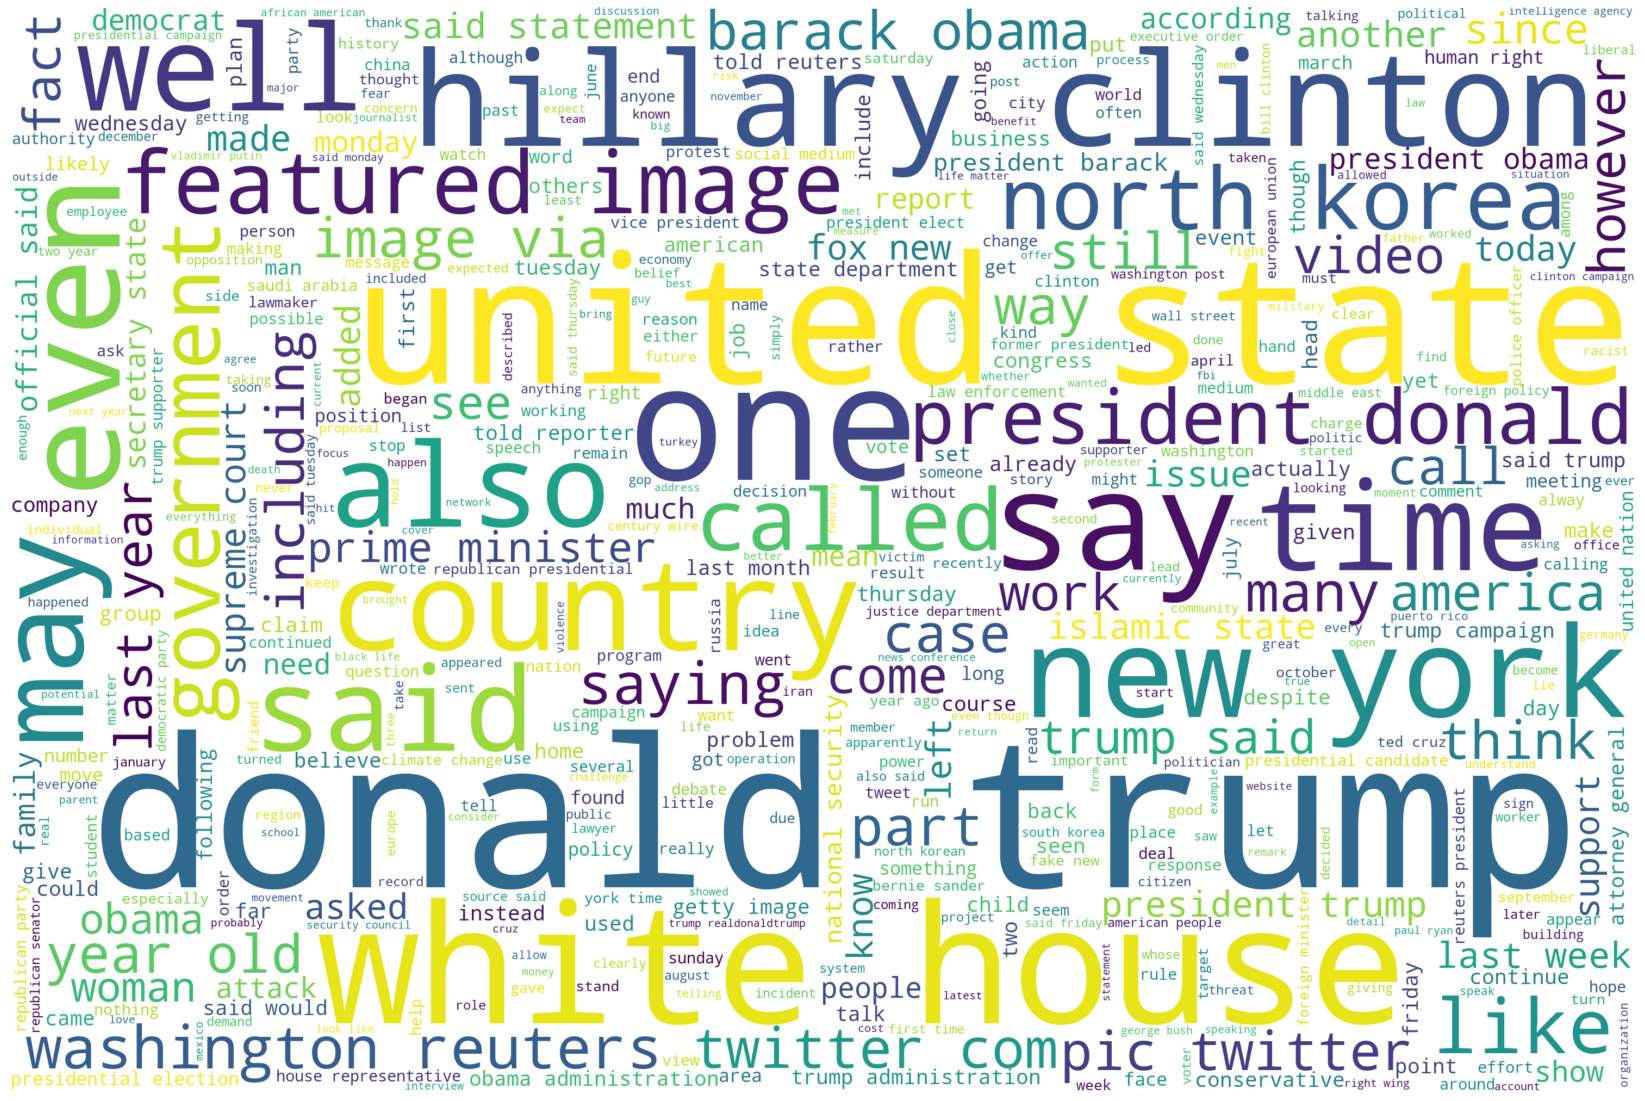

In [9]:
# Create a word cloud of top 500 words for presentation
text = " ".join([x for x in news_data['text']])

plt.rcParams['figure.figsize'] = (30, 20)

# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_words = 500,
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()